## Laboratorio 3 - Deep Learning
Stefano Aragoni, Carol Arevalo

-----------------

En parejas, utilicen la serie de tiempo en Monthly Sunspots y realicen el siguiente ejercicios:
Implemente 3 redes neuronales con las siguientes estructuras para resolver el problema de regresión:

1. Feed Forward NN (Red Simple)
2. RNN
3. LSTM

Documente sus resultados, discuta pros y contras de utilizar cada arquitectura y justifique cual sería su
elección para resolver este problema basado en los resultados obtenidos y la teoría revisada en clase.

---------------

#### Importar librerías



In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM
from keras.callbacks import EarlyStopping

---------------

#### Importar Datos y Limpieza de Datos

In [67]:
#Cargar los datos
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv"
data = pd.read_csv(url)

data.head()

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


In [68]:
# Convertir Month en datetime
data['Date'] = pd.to_datetime(data['Month'])
data = data.drop('Month', axis=1)

# Reordenar columnas
cols = list(data.columns.values)
cols.pop(cols.index('Sunspots'))
data = data[cols+['Sunspots']]

# Ordenar por fecha
data = data.sort_values(by='Date')

data.head(-5)

,Date,Sunspots
0,1749-01-01,58.0
1,1749-02-01,62.6
2,1749-03-01,70.0
3,1749-04-01,55.7
4,1749-05-01,85.0
...,...,...
2810,1983-03-01,66.5
2811,1983-04-01,80.7
2812,1983-05-01,99.2
2813,1983-06-01,91.1


<AxesSubplot: >

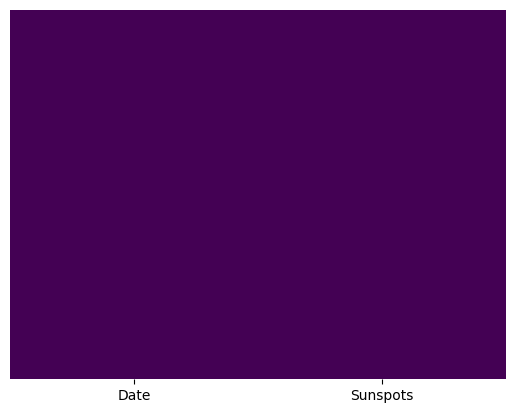

In [69]:
# Revisar datos faltantes
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')


In [70]:
# Escalar / Normalizar datos
scaler = MinMaxScaler(feature_range=(0, 1))

sunspots = data['Sunspots'].values
sunspots_normalizado = scaler.fit_transform(sunspots.reshape(-1, 1))     # Normalizar datos de Sunspots de 0 a 1

# Agregar datos normalizados a dataframe
data['Sunspots'] = sunspots_normalizado

data.head(-5)

,Date,Sunspots
0,1749-01-01,0.228526
1,1749-02-01,0.246651
2,1749-03-01,0.275808
3,1749-04-01,0.219464
4,1749-05-01,0.334909
...,...,...
2810,1983-03-01,0.262017
2811,1983-04-01,0.317967
2812,1983-05-01,0.390859
2813,1983-06-01,0.358944


---------------

#### Creacion de conjuntos de prueba, validacion, entrenamiento

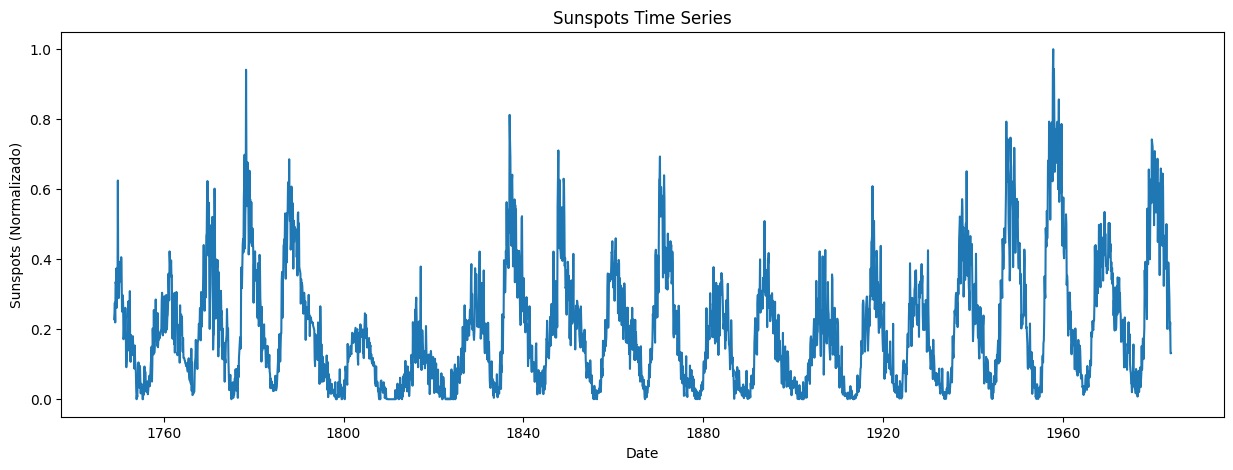

In [71]:
# Graficar el dataset X = fecha, Y = Sunspots_Normalizado

plt.figure(figsize=(15, 5))
plt.plot(data['Date'], data['Sunspots'])
plt.title('Sunspots Time Series')
plt.xlabel('Date')
plt.ylabel('Sunspots (Normalizado)')
plt.show()

In [93]:
#### Referencias 
#https://www.datacamp.com/tutorial/tutorial-for-recurrent-neural-network

# Separa los datos a partir de una fecha
def date_split(dataset, tstart, tend):
    train = dataset.loc[f"{tstart}":f"{tend}", 'Sunspots'].values
    test = dataset.loc[f"{tend+1}":, 'Sunspots'].values
    return train, test

training_set, test_set = date_split(data, 1749, 1912)         # Genera el traning set de 1749 a 1912 y el test set de 1913 a 1983

In [94]:
# Crea las secuencias para el entrenamiento y prueba de la red neuronal
def create_sequences(data, time_steps):
    sequences = []
    for i in range(len(data) - time_steps):
        sequence = data[i:i+time_steps]
        target = data[i+time_steps]
        sequences.append((sequence, target))
    return sequences

time_steps = 10  # Cantidad de fechas a considerar para predecir la siguiente
training_sequences = create_sequences(training_set, time_steps)
testing_sequences = create_sequences(test_set, time_steps)

# Crea los arreglos de entrenamiento y prueba
X_train = np.array([sequence for sequence, target in training_sequences])
y_train = np.array([target for sequence, target in training_sequences])
X_test = np.array([sequence for sequence, target in testing_sequences])
y_test = np.array([target for sequence, target in testing_sequences])

# Separar X_test y y_test en dos partes iguales, para tener un conjunto de validación
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, shuffle=False)

In [96]:
# Verificar el contenido de X_test, y_test
print(X_test[0], "\n------------------")
print(y_test[0])

# Incluye los valores de Sunspots normalizados, sin la fecha. 

[0.18951931 0.15563436 0.35657998 0.34239559 0.12726556 0.17927502
 0.15563436 0.22340426 0.18360914 0.26122931] 
------------------
0.1272655634357762


---------------

#### Redes Neuronales

Objetivo: Resolver el problema de regresión

##### Red Neuronal 1: Feed Forward NN (Red Simple)

- Funciones de activación:
    - a
- Números de capas y neuronas:
    - b
- Técnicas de regularización:
    - c

In [104]:
model_ffnn = Sequential([
    Dense(64, activation='relu', input_shape=(time_steps,)),
    Dense(32),
    Dense(1)
])

Epoch 1/100
10/10 [==============================] - 1s 15ms/step - loss: 0.0036 - val_loss: 0.0047
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0032 - val_loss: 0.0047
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0029 - val_loss: 0.0049
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0027 - val_loss: 0.0046
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0026 - val_loss: 0.0045
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0027 - val_loss: 0.0049
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - val_loss: 0.0046
Epoch 8/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0025 - val_loss: 0.0046
Epoch 9/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0024 - val_loss: 0.0048
Epoch 10/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0025 - val_loss: 0.0047


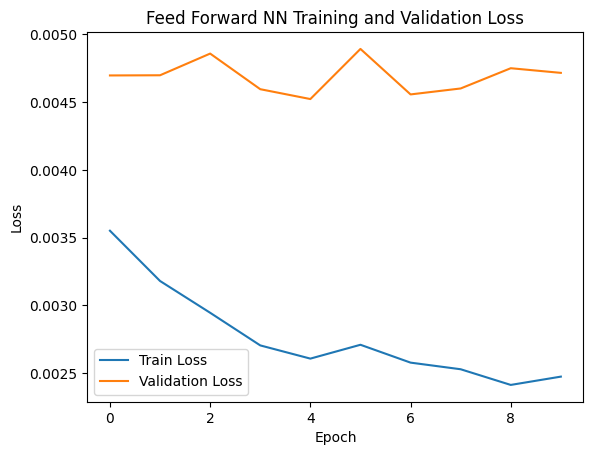

Feed Forward NN - Train Loss: 0.0025, Test Loss: 0.0045


In [105]:

model_ffnn.compile(optimizer='adam', loss='mean_squared_error')

# Train the Feed Forward NN model
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
history_ffnn = model_ffnn.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the Feed Forward NN model
train_loss_ffnn = model_ffnn.evaluate(X_train, y_train, verbose=0)
test_loss_ffnn = model_ffnn.evaluate(X_test, y_test, verbose=0)

# Plot the loss during training for the Feed Forward NN model
plt.plot(history_ffnn.history['loss'], label='Train Loss')
plt.plot(history_ffnn.history['val_loss'], label='Validation Loss')
plt.title(f'Feed Forward NN Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(f'Feed Forward NN - Train Loss: {train_loss_ffnn:.4f}, Test Loss: {test_loss_ffnn:.4f}')


##### Red Neuronal 2: RNN

- Funciones de activación:
    - a
- Números de capas y neuronas:
    - b
- Técnicas de regularización:
    - c

In [60]:
model_rnn = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(time_steps, 1)),
    Dense(1)
])

##### Red Neuronal 3: LSTM

- Funciones de activación:
    - a
- Números de capas y neuronas:
    - b
- Técnicas de regularización:
    - c

In [61]:
model_lstm = Sequential([
    LSTM(64, activation='relu', input_shape=(time_steps, 1)),
    Dense(1)
])